In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
plt.style.use('default')

In [5]:
df = pd.read_csv("data/마천시장_Arima_pred_Data.csv", encoding= 'ansi') 

In [6]:
df.head()

,Date,딥러닝_공실률
0,2015-03-01,3.251
1,2015-06-01,3.002
2,2015-09-01,4.732
3,2015-12-01,3.619
4,2016-03-01,4.569


In [7]:
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
df = df.set_index(df['Date'])
df = df.iloc[:, 1]
df.head()

Date
2015-03-01    3.251
2015-06-01    3.002
2015-09-01    4.732
2015-12-01    3.619
2016-03-01    4.569
Name: 딥러닝_공실률, dtype: float64

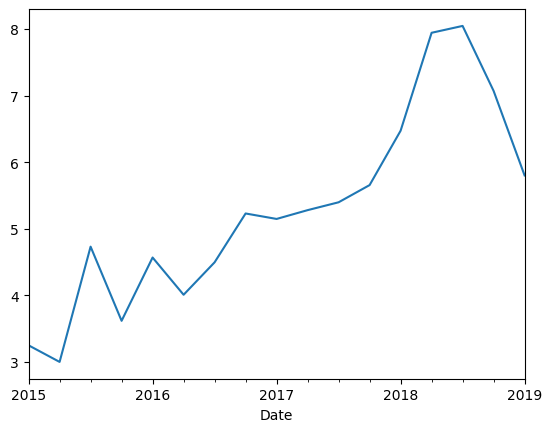

In [9]:
df.plot()

In [10]:
from statsmodels.tsa.arima_model import ARIMA

In [26]:
m = ARIMA(df, [0,1,1])
r = m.fit()
print(r.summary())

                             ARIMA Model Results                              
Dep. Variable:              D.딥러닝_공실률   No. Observations:                   16
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 -18.570
Method:                       css-mle   S.D. of innovations              0.707
Date:                Fri, 18 Oct 2019   AIC                             43.140
Time:                        15:46:40   BIC                             45.458
Sample:                    06-01-2015   HQIC                            43.259
                         - 03-01-2019                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2568      0.035      7.337      0.000       0.188       0.325
ma.L1.D.딥러닝_공실률    -1.0000      0.184     -5.424      0.000      -1.361      -0.639
                                

C:\Users\Q\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  % freq, ValueWarning)
C:\Users\Q\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  % freq, ValueWarning)


In [27]:
r.forecast(steps= 4)

(array([7.68458323, 7.9413749 , 8.19816656, 8.45495822]),
 array([0.70691025, 0.70691025, 0.70691025, 0.70691025]),
 array([[6.2990646 , 9.07010187],
        [6.55585626, 9.32689353],
        [6.81264792, 9.58368519],
        [7.06943959, 9.84047686]]))